In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
df = pd.get_dummies(df, dtype = "int")

In [5]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
scaled_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


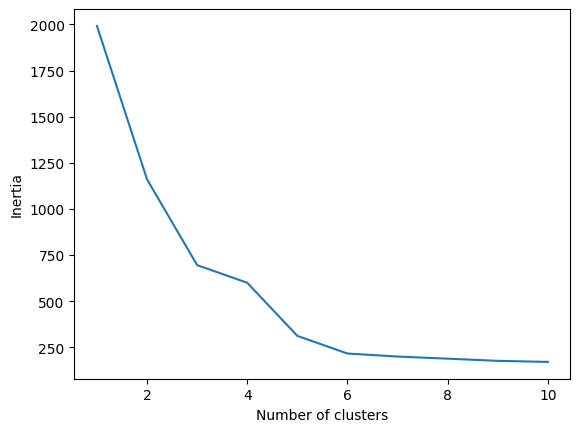

In [6]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(scaled_df)
    inertia.append(kmeans.inertia_)


sns.lineplot(x = range(1,11), y = inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

clusters = 4

In [7]:
kmeans = KMeans(n_clusters = clusters).fit(scaled_df)
df["label"] = kmeans.labels_
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,3
1,39.5,17.4,186.0,3800.0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0
3,36.7,19.3,193.0,3450.0,1,0,0
4,39.3,20.6,190.0,3650.0,0,1,3


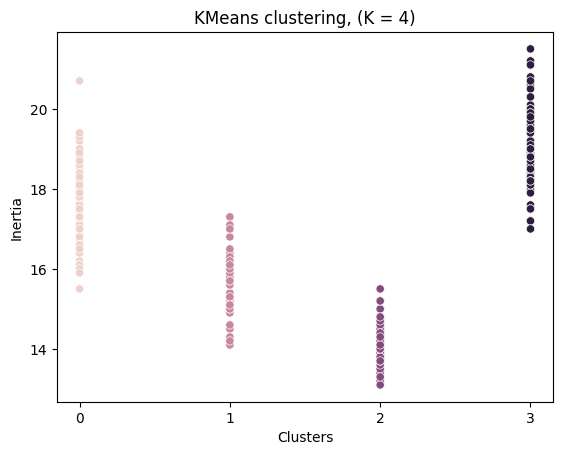

In [8]:
sns.scatterplot(data = df, x = "label", y = "culmen_depth_mm", \
                hue = kmeans.labels_, legend = False)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(range(int(df["label"].min()), int(df["label"].max() + 1)))
plt.title("KMeans clustering, (K = 4)")
plt.show()

In [9]:
stat_penguins = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', "label"]].groupby("label").mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             40.217757        17.611215         189.046729
1             49.473770        15.718033         221.540984
2             45.563793        14.237931         212.706897
3             43.878302        19.111321         194.764151
